In [1]:
# Import necessary libraries
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/Users/vijeethvj8/Documents/Kaggle projects/Loan Approval Prediction/train.csv')
test_data = pd.read_csv('/Users/vijeethvj8/Documents/Kaggle projects/Loan Approval Prediction/test.csv')

# Display the first few rows of the train and test data
train_data.head(), test_data.head()


(   id  person_age  person_income person_home_ownership  person_emp_length  \
 0   0          37          35000                  RENT                0.0   
 1   1          22          56000                   OWN                6.0   
 2   2          29          28800                   OWN                8.0   
 3   3          30          70000                  RENT               14.0   
 4   4          22          60000                  RENT                2.0   
 
   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
 0   EDUCATION          B       6000          11.49                 0.17   
 1     MEDICAL          C       4000          13.35                 0.07   
 2    PERSONAL          A       6000           8.90                 0.21   
 3     VENTURE          B      12000          11.11                 0.17   
 4     MEDICAL          A       6000           6.92                 0.10   
 
   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  


In [2]:
# Get a summary of the dataset
print("Train Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3),

In [3]:
# One-Hot Encoding for categorical features
train_data_encoded = pd.get_dummies(train_data, columns=[
    'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'
])

test_data_encoded = pd.get_dummies(test_data, columns=[
    'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'
])

# Verify the new columns created
train_data_encoded.head(), test_data_encoded.head()


(   id  person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
 0   0          37          35000                0.0       6000          11.49   
 1   1          22          56000                6.0       4000          13.35   
 2   2          29          28800                8.0       6000           8.90   
 3   3          30          70000               14.0      12000          11.11   
 4   4          22          60000                2.0       6000           6.92   
 
    loan_percent_income  cb_person_cred_hist_length  loan_status  \
 0                 0.17                          14            0   
 1                 0.07                           2            0   
 2                 0.21                          10            0   
 3                 0.17                           5            0   
 4                 0.10                           3            0   
 
    person_home_ownership_MORTGAGE  ...  loan_intent_VENTURE  loan_grade_A  \
 0                

In [4]:
# Features (X) and Target (y) for the training set
X_train = train_data_encoded.drop(['loan_status', 'id'], axis=1)  # Drop loan_status (target) and id (identifier)
y_train = train_data_encoded['loan_status']  # Target variable

# Features for the test set (we won't have loan_status in the test set)
X_test = test_data_encoded.drop(['id'], axis=1)


In [5]:
from sklearn.model_selection import train_test_split

# Split the training data into train and validation sets (80% train, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training split
model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred = model.predict(X_val_split)

# Evaluate the model accuracy
accuracy = accuracy_score(y_val_split, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.8991


/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_split, y_train_split)

# Predict on validation data
y_rf_pred = rf_model.predict(X_val_split)

# Calculate accuracy
rf_accuracy = accuracy_score(y_val_split, y_rf_pred)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.4f}")


Random Forest Validation Accuracy: 0.9525


In [8]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n", classification_report(y_val_split, y_rf_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.92      0.72      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



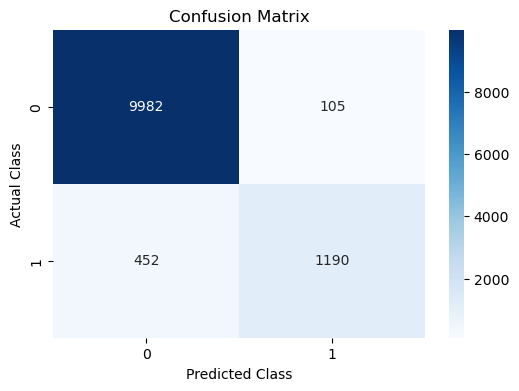

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_rf_pred)

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [10]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val_split, rf_model.predict_proba(X_val_split)[:,1])
print(f"Random Forest ROC-AUC Score: {roc_auc:.4f}")


Random Forest ROC-AUC Score: 0.9359


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]   # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the Random Forest model and hyperparameter grid
grid_search = GridSearchCV(
    estimator=rf_model,          # Model to be used
    param_grid=param_grid,       # Hyperparameter grid to search
    cv=5,                        # Cross-validation folds
    n_jobs=-1,                   # Use all available cores
    verbose=3                    # Print detailed output for each fit iteration
)

# Perform the grid search
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters and the best validation accuracy
print("\nBest Parameters: ", grid_search.best_params_)
print("Best Validation Accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Validation Accuracy:  0.9507843991314398


In [12]:
# Retrieve the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the validation set
y_val_best_pred = best_rf_model.predict(X_val_split)

# Calculate validation accuracy
accuracy_best = accuracy_score(y_val_split, y_val_best_pred)
print(f"Validation Accuracy with Best Parameters: {accuracy_best:.4f}")


Validation Accuracy with Best Parameters: 0.9529


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.93      0.72      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



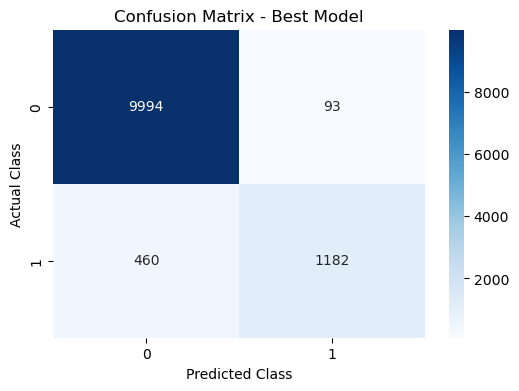

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:\n", classification_report(y_val_split, y_val_best_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_val_best_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Model')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [14]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
roc_auc_best = roc_auc_score(y_val_split, best_rf_model.predict_proba(X_val_split)[:,1])
print(f"ROC-AUC Score with Best Parameters: {roc_auc_best:.4f}")


ROC-AUC Score with Best Parameters: 0.9426


In [15]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=20, learning_rate=0.1, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_split, y_train_split)

# Make predictions and evaluate
y_xgb_pred = xgb_model.predict(X_val_split)
roc_auc_xgb = roc_auc_score(y_val_split, xgb_model.predict_proba(X_val_split)[:, 1])
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.4f}")


XGBoost ROC-AUC Score: 0.9484


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'subsample': [0.8, 0.9, 1.0]
}


In [17]:
# Perform randomized search for hyperparameters
random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42), 
    param_distributions=param_grid_xgb, 
    n_iter=20, 
    cv=5, 
    verbose=3, 
    n_jobs=-1
)

# Fit the randomized search
random_search_xgb.fit(X_train_split, y_train_split)

# Print the best parameters and score
print("Best Parameters: ", random_search_xgb.best_params_)
print("Best ROC-AUC Score: ", random_search_xgb.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 30, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 0.8}
Best ROC-AUC Score:  0.9521059176419525


In [18]:
# Retrieve the best model from RandomizedSearchCV
best_xgb_model = random_search_xgb.best_estimator_

# Make predictions on the validation set
y_val_best_pred = best_xgb_model.predict(X_val_split)

# Calculate the ROC-AUC score on validation data
roc_auc_best = roc_auc_score(y_val_split, best_xgb_model.predict_proba(X_val_split)[:, 1])
print(f"ROC-AUC Score with Best Parameters: {roc_auc_best:.4f}")


ROC-AUC Score with Best Parameters: 0.9560


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.92      0.73      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



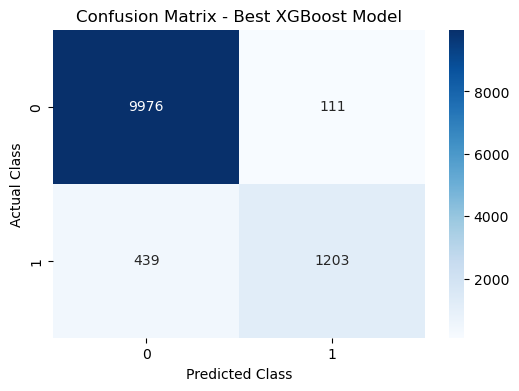

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("Classification Report:\n", classification_report(y_val_split, y_val_best_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_val_best_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best XGBoost Model')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('xgb', best_xgb_model)
], voting='soft')

# Fit the voting classifier on the training set
voting_clf.fit(X_train_split, y_train_split)

# Make predictions and evaluate the ensemble model on the validation set
y_voting_pred = voting_clf.predict(X_val_split)
roc_auc_voting = roc_auc_score(y_val_split, voting_clf.predict_proba(X_val_split)[:, 1])
print(f"Voting Classifier ROC-AUC Score: {roc_auc_voting:.4f}")


Voting Classifier ROC-AUC Score: 0.9536


Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.93      0.73      0.82      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



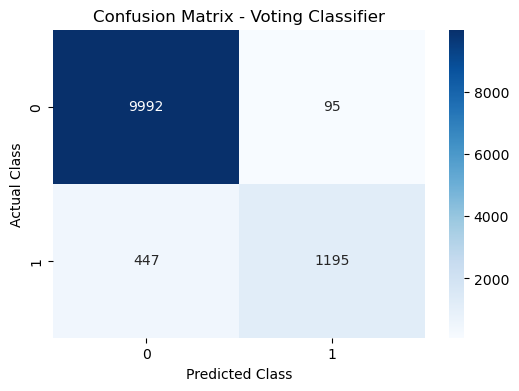

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("Classification Report for Voting Classifier:\n", classification_report(y_val_split, y_voting_pred))

# Confusion matrix
conf_matrix_voting = confusion_matrix(y_val_split, y_voting_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Classifier')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [22]:
# Get the predicted probabilities
y_voting_proba = voting_clf.predict_proba(X_val_split)[:, 1]

# Adjust the decision threshold
threshold = 0.4  # Lowering the threshold to increase recall for Class 1
y_voting_thresh_pred = (y_voting_proba >= threshold).astype(int)

# Evaluate the new predictions with the adjusted threshold
print("Classification Report with Adjusted Threshold:\n", classification_report(y_val_split, y_voting_thresh_pred))


Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.82      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



In [23]:
# Initialize XGBoost with class weighting
xgb_model_weighted = XGBClassifier(
    n_estimators=200, 
    max_depth=20, 
    learning_rate=0.2, 
    gamma=5, 
    colsample_bytree=0.6, 
    subsample=1.0, 
    scale_pos_weight=(len(y_train_split) / sum(y_train_split == 1)),  # Adjusting class weight for imbalance
    random_state=42
)

# Train the model with weighted classes
xgb_model_weighted.fit(X_train_split, y_train_split)

# Evaluate performance
y_val_weighted_pred = xgb_model_weighted.predict(X_val_split)
roc_auc_weighted = roc_auc_score(y_val_split, xgb_model_weighted.predict_proba(X_val_split)[:, 1])
print(f"ROC-AUC Score with Weighted XGBoost: {roc_auc_weighted:.4f}")


ROC-AUC Score with Weighted XGBoost: 0.9542


In [24]:
# Evaluate the classification report with the weighted XGBoost model
print("Classification Report with Weighted XGBoost:\n", classification_report(y_val_split, y_val_weighted_pred))


Classification Report with Weighted XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     10087
           1       0.73      0.81      0.77      1642

    accuracy                           0.93     11729
   macro avg       0.85      0.88      0.87     11729
weighted avg       0.94      0.93      0.93     11729



In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Base models
xgb_model = XGBClassifier(n_estimators=200, max_depth=20, learning_rate=0.2, gamma=5, colsample_bytree=0.6, subsample=1.0, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

# Meta-model (can be Logistic Regression or another simple classifier)
meta_model = LogisticRegression()

# Stacking Classifier
stacked_model = StackingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model)], final_estimator=meta_model, cv=5)

# Train the stacked model
stacked_model.fit(X_train_split, y_train_split)

# Evaluate performance on validation set
y_stacked_pred = stacked_model.predict(X_val_split)
roc_auc_stacked = roc_auc_score(y_val_split, stacked_model.predict_proba(X_val_split)[:, 1])
print(f"Stacking Classifier ROC-AUC Score: {roc_auc_stacked:.4f}")


Stacking Classifier ROC-AUC Score: 0.9572


In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'xgb__n_estimators': [200, 300],
    'xgb__learning_rate': [0.1, 0.2],
    'xgb__max_depth': [10, 20],
    'rf__n_estimators': [200, 300],
    'rf__max_depth': [20, 30]
}

# Set verbose=5 for real-time detailed output
random_search_stacked = RandomizedSearchCV(
    estimator=stacked_model, 
    param_distributions=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=5,  # Detailed output for each fold
    return_train_score=True
)

# Fit the randomized search
random_search_stacked.fit(X_train_split, y_train_split)

# After fitting, print the results
print("\nBest Parameters for Stacked Model: ", random_search_stacked.best_params_)
print("Best ROC-AUC for Stacked Model: ", random_search_stacked.best_score_)

# Print each combination and their corresponding ROC-AUC scores
results = random_search_stacked.cv_results_
for i in range(len(results['params'])):
    print(f"Combination {i+1}: {results['params'][i]}")
    print(f"Mean ROC-AUC Score: {results['mean_test_score'][i]:.4f}")
    print('-' * 40)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# Retrieve the best model
best_stacked_model = random_search_stacked.best_estimator_

# Make predictions on the validation set
y_stacked_pred = best_stacked_model.predict(X_val_split)

# Calculate ROC-AUC score
roc_auc_stacked = roc_auc_score(y_val_split, best_stacked_model.predict_proba(X_val_split)[:, 1])
print(f"Final ROC-AUC Score for Stacked Model: {roc_auc_stacked:.4f}")

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:\n", classification_report(y_val_split, y_stacked_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_stacked_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Stacked Model')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [ ]:
# Get predicted probabilities from the best stacked model
y_stacked_proba = best_stacked_model.predict_proba(X_val_split)[:, 1]

# Adjust the decision threshold (try 0.45 or lower)
threshold = 0.45
y_thresh_pred = (y_stacked_proba >= threshold).astype(int)

# Evaluate with the adjusted threshold
from sklearn.metrics import roc_auc_score, classification_report

roc_auc_thresh = roc_auc_score(y_val_split, y_stacked_proba)
print(f"ROC-AUC Score with Adjusted Threshold: {roc_auc_thresh:.4f}")
print("Classification Report with Adjusted Threshold:\n", classification_report(y_val_split, y_thresh_pred))


In [ ]:
# Get predicted probabilities from each model
xgb_proba = best_stacked_model.named_estimators_['xgb'].predict_proba(X_val_split)[:, 1]
rf_proba = best_stacked_model.named_estimators_['rf'].predict_proba(X_val_split)[:, 1]
stacked_proba = best_stacked_model.predict_proba(X_val_split)[:, 1]

# Blending: Averaging the probabilities
blended_proba = (xgb_proba + rf_proba + stacked_proba) / 3

# Adjust decision threshold for the blended model
blended_thresh = 0.45  # Adjust threshold if needed
blended_pred = (blended_proba >= blended_thresh).astype(int)

# Evaluate the blended model with ROC-AUC
roc_auc_blended = roc_auc_score(y_val_split, blended_proba)
print(f"Blended Model ROC-AUC Score: {roc_auc_blended:.4f}")

# Classification report for blended model
print("Classification Report for Blended Model:\n", classification_report(y_val_split, blended_pred))


In [ ]:
# Fit the Random Forest model on the training data
rf_model.fit(X_train_split, y_train_split)

# Now get the predicted probabilities from individual models (XGBoost and Random Forest)
xgb_proba = best_xgb_model.predict_proba(X_val_split)[:, 1]
rf_proba = rf_model.predict_proba(X_val_split)[:, 1]

# Optimize the blending weights
alpha = 0.7  # Weight for XGBoost
beta = 1 - alpha  # Weight for Random Forest

# Calculate weighted average of probabilities
blended_proba_weighted = (alpha * xgb_proba) + (beta * rf_proba)

# Make predictions based on the blended probabilities
y_blended_weighted_pred = (blended_proba_weighted >= 0.5).astype(int)

# Evaluate the performance of the weighted blended model
roc_auc_blended_weighted = roc_auc_score(y_val_split, blended_proba_weighted)
print(f"Weighted Blended Model ROC-AUC Score: {roc_auc_blended_weighted:.4f}")

# Classification report for the weighted blended model
print("Classification Report for Weighted Blended Model:\n", classification_report(y_val_split, y_blended_weighted_pred))


In [ ]:
# Adjust the blending weights (try different values)
alpha = 0.6  # Experiment with different alpha values
beta = 1 - alpha  # The weight for Random Forest

# Calculate weighted probabilities
blended_proba_weighted = (alpha * xgb_proba) + (beta * rf_proba)

# Evaluate the blended model
y_blended_weighted_pred = (blended_proba_weighted >= 0.5).astype(int)
roc_auc_blended_weighted = roc_auc_score(y_val_split, blended_proba_weighted)
print(f"ROC-AUC with adjusted alpha ({alpha}): {roc_auc_blended_weighted:.4f}")


In [ ]:
import lightgbm as lgb

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=200, max_depth=10, learning_rate=0.2, random_state=42)

# Train LightGBM
lgb_model.fit(X_train_split, y_train_split)

# Get predicted probabilities from LightGBM
lgb_proba = lgb_model.predict_proba(X_val_split)[:, 1]

# Blend XGBoost, Random Forest, and LightGBM probabilities
alpha = 0.6  # Weight for XGBoost
beta = 0.2   # Weight for Random Forest
gamma = 1 - (alpha + beta)  # Weight for LightGBM

# Weighted average of probabilities
blended_proba_all = (alpha * xgb_proba) + (beta * rf_proba) + (gamma * lgb_proba)

# Make predictions based on blended probabilities
y_blended_all_pred = (blended_proba_all >= 0.5).astype(int)

# Evaluate the new blended model
roc_auc_blended_all = roc_auc_score(y_val_split, blended_proba_all)
print(f"Blended Model (XGB + RF + LGB) ROC-AUC Score: {roc_auc_blended_all:.4f}")

# Print classification report
print("Classification Report for Blended Model with LightGBM:\n", classification_report(y_val_split, y_blended_all_pred))


In [ ]:
train_data['income_to_loan_ratio'] = train_data['person_income'] / train_data['loan_amnt']
test_data['income_to_loan_ratio'] = test_data['person_income'] / test_data['loan_amnt']

train_data['age_income_interaction'] = train_data['person_age'] * train_data['person_income']
test_data['age_income_interaction'] = test_data['person_age'] * test_data['person_income']

train_data['cred_hist_loan_amnt_ratio'] = train_data['cb_person_cred_hist_length'] / train_data['loan_amnt']
test_data['cred_hist_loan_amnt_ratio'] = test_data['cb_person_cred_hist_length'] / test_data['loan_amnt']


In [ ]:
from skopt import BayesSearchCV

# Define the parameter space for Bayesian optimization
param_space = {
    'n_estimators': (100, 300),
    'max_depth': (5, 20),
    'learning_rate': (0.01, 0.3),
    'gamma': (0, 5),
    'colsample_bytree': (0.5, 1.0),
    'subsample': (0.7, 1.0)
}

# Initialize Bayesian search for XGBoost
bayes_search_xgb = BayesSearchCV(estimator=best_xgb_model, search_spaces=param_space, n_iter=50, cv=5, n_jobs=-1, verbose=5)

# Fit Bayesian search
bayes_search_xgb.fit(X_train_split, y_train_split)

# Get the best parameters and score
best_params_bayes = bayes_search_xgb.best_params_
best_roc_auc_bayes = bayes_search_xgb.best_score_
print(f"Best ROC-AUC with Bayesian Optimization: {best_roc_auc_bayes:.4f}")


In [ ]:
# Blend the probabilities with different weights
# Adjust alpha, beta, and gamma to fine-tune the blend
alpha = 0.5  # Weight for XGBoost
beta = 0.3   # Weight for Random Forest
gamma = 1 - (alpha + beta)  # Weight for LightGBM

# Weighted average of probabilities
blended_proba_optimized = (alpha * xgb_proba) + (beta * rf_proba) + (gamma * lgb_proba)

# Make predictions based on blended probabilities
y_blended_optimized_pred = (blended_proba_optimized >= 0.5).astype(int)

# Evaluate the blended model
roc_auc_blended_optimized = roc_auc_score(y_val_split, blended_proba_optimized)
print(f"Optimized Blended Model ROC-AUC Score: {roc_auc_blended_optimized:.4f}")

# Print classification report
print("Classification Report for Optimized Blended Model:\n", classification_report(y_val_split, y_blended_optimized_pred))


In [ ]:
from catboost import CatBoostClassifier

# Initialize CatBoost model
cat_model = CatBoostClassifier(iterations=200, depth=10, learning_rate=0.1, verbose=0)

# Train CatBoost
cat_model.fit(X_train_split, y_train_split)

# Get CatBoost predicted probabilities
cat_proba = cat_model.predict_proba(X_val_split)[:, 1]

# Adjust blending weights (XGBoost, Random Forest, LightGBM, CatBoost)
alpha = 0.4  # Weight for XGBoost
beta = 0.2   # Weight for Random Forest
gamma = 0.2  # Weight for LightGBM
delta = 1 - (alpha + beta + gamma)  # Weight for CatBoost

# Calculate weighted average of probabilities with CatBoost
blended_proba_with_cat = (alpha * xgb_proba) + (beta * rf_proba) + (gamma * lgb_proba) + (delta * cat_proba)

# Make predictions based on the blended probabilities
y_blended_with_cat_pred = (blended_proba_with_cat >= 0.5).astype(int)

# Evaluate the blended model with CatBoost
roc_auc_blended_with_cat = roc_auc_score(y_val_split, blended_proba_with_cat)
print(f"Blended Model with CatBoost ROC-AUC Score: {roc_auc_blended_with_cat:.4f}")

# Print classification report
print("Classification Report for Blended Model with CatBoost:\n", classification_report(y_val_split, y_blended_with_cat_pred))


In [ ]:
# Adjust blending weights for XGBoost, Random Forest, LightGBM, and CatBoost
alpha = 0.45  # Weight for XGBoost
beta = 0.2    # Weight for Random Forest
gamma = 0.2   # Weight for LightGBM
delta = 1 - (alpha + beta + gamma)  # Weight for CatBoost

# Calculate weighted average of probabilities
blended_proba_optimized_cat = (alpha * xgb_proba) + (beta * rf_proba) + (gamma * lgb_proba) + (delta * cat_proba)

# Make predictions based on blended probabilities
y_blended_optimized_cat_pred = (blended_proba_optimized_cat >= 0.5).astype(int)

# Evaluate the blended model with optimized weights
roc_auc_blended_optimized_cat = roc_auc_score(y_val_split, blended_proba_optimized_cat)
print(f"Optimized Blended Model with CatBoost ROC-AUC Score: {roc_auc_blended_optimized_cat:.4f}")

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report for Optimized Blended Model with CatBoost:\n", classification_report(y_val_split, y_blended_optimized_cat_pred))


In [ ]:
# Adjust the decision threshold
threshold = 0.4  # Try lowering this to improve recall for Class 1

# Make predictions based on the new threshold
y_thresh_pred = (blended_proba_optimized_cat >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
roc_auc_thresh = roc_auc_score(y_val_split, blended_proba_optimized_cat)
print(f"ROC-AUC with Adjusted Threshold ({threshold}): {roc_auc_thresh:.4f}")

# Print classification report
print("Classification Report with Adjusted Threshold:\n", classification_report(y_val_split, y_thresh_pred))


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('xgb', best_xgb_model),
    ('rf', rf_model),
    ('lgb', lgb_model),
    ('cat', cat_model)
]

# Meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Create a Stacking Classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacked model
stacked_model.fit(X_train_split, y_train_split)

# Evaluate the stacked model
y_stacked_pred = stacked_model.predict(X_val_split)
roc_auc_stacked = roc_auc_score(y_val_split, stacked_model.predict_proba(X_val_split)[:, 1])
print(f"Two-Layer Stacked Model ROC-AUC Score: {roc_auc_stacked:.4f}")

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report for Two-Layer Stacked Model:\n", classification_report(y_val_split, y_stacked_pred))


In [ ]:
from sklearn.linear_model import RidgeClassifier

# Define a Ridge meta-model
meta_model = RidgeClassifier()

# Create a Stacking Classifier with the Ridge meta-model
stacked_model_ridge = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacked model
stacked_model_ridge.fit(X_train_split, y_train_split)

# Evaluate the Ridge-stacked model
y_stacked_ridge_pred = stacked_model_ridge.predict(X_val_split)
roc_auc_stacked_ridge = roc_auc_score(y_val_split, stacked_model_ridge.predict_proba(X_val_split)[:, 1])
print(f"Ridge-Stacked Model ROC-AUC Score: {roc_auc_stacked_ridge:.4f}")

# Print classification report
print("Classification Report for Ridge-Stacked Model:\n", classification_report(y_val_split, y_stacked_ridge_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression meta-model
meta_model = LogisticRegression()

# Create a Stacking Classifier with Logistic Regression as the meta-model
stacked_model_logreg = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacked model
stacked_model_logreg.fit(X_train_split, y_train_split)

# Evaluate the Logistic Regression-stacked model
y_stacked_logreg_pred = stacked_model_logreg.predict(X_val_split)
roc_auc_stacked_logreg = roc_auc_score(y_val_split, stacked_model_logreg.predict_proba(X_val_split)[:, 1])
print(f"Logistic Regression-Stacked Model ROC-AUC Score: {roc_auc_stacked_logreg:.4f}")

# Print classification report
print("Classification Report for Logistic Regression-Stacked Model:\n", classification_report(y_val_split, y_stacked_logreg_pred))


In [ ]:
# Adjust the decision threshold (try lowering it to 0.45 or 0.4 to boost recall)
threshold = 0.45

# Get probabilities from the stacked model
y_stacked_proba = stacked_model_logreg.predict_proba(X_val_split)[:, 1]

# Make predictions with the adjusted threshold
y_thresh_pred = (y_stacked_proba >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
roc_auc_thresh = roc_auc_score(y_val_split, y_stacked_proba)
print(f"ROC-AUC with Adjusted Threshold ({threshold}): {roc_auc_thresh:.4f}")

# Print classification report with the adjusted threshold
print("Classification Report with Adjusted Threshold:\n", classification_report(y_val_split, y_thresh_pred))



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the final stacked model
cv_scores = cross_val_score(stacked_model_logreg, X_train, y_train, cv=5, scoring='roc_auc')

# Print the cross-validation ROC-AUC scores
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean Cross-Validation ROC-AUC: {cv_scores.mean():.4f}")


In [ ]:
# Adjust the decision threshold (try 0.45 or 0.4 to improve recall for Class 1)
threshold = 0.45

# Get predicted probabilities from the stacked model
y_stacked_proba = stacked_model_logreg.predict_proba(X_val_split)[:, 1]

# Make predictions with the new threshold
y_thresh_pred = (y_stacked_proba >= threshold).astype(int)

# Evaluate with the adjusted threshold
roc_auc_thresh = roc_auc_score(y_val_split, y_stacked_proba)
print(f"ROC-AUC with Adjusted Threshold ({threshold}): {roc_auc_thresh:.4f}")

# Print classification report with adjusted threshold
from sklearn.metrics import classification_report
print("Classification Report with Adjusted Threshold:\n", classification_report(y_val_split, y_thresh_pred))


In [ ]:
train_data['income_to_loan_ratio'] = train_data['person_income'] / train_data['loan_amnt']
test_data['income_to_loan_ratio'] = test_data['person_income'] / test_data['loan_amnt']

train_data['cred_hist_loan_amnt_ratio'] = train_data['cb_person_cred_hist_length'] / train_data['loan_amnt']
test_data['cred_hist_loan_amnt_ratio'] = test_data['cb_person_cred_hist_length'] / test_data['loan_amnt']

train_data['age_income_ratio'] = train_data['person_age'] / train_data['person_income']
test_data['age_income_ratio'] = test_data['person_age'] / test_data['person_income']

train_data['age_cred_hist_interaction'] = train_data['person_age'] * train_data['cb_person_cred_hist_length']
test_data['age_cred_hist_interaction'] = test_data['person_age'] * test_data['cb_person_cred_hist_length']


In [ ]:
# Retrain base models with the updated dataset
best_xgb_model.fit(X_train_split, y_train_split)
rf_model.fit(X_train_split, y_train_split)
lgb_model.fit(X_train_split, y_train_split)
cat_model.fit(X_train_split, y_train_split)

# Re-evaluate the stacking model with the new features
stacked_model_logreg.fit(X_train_split, y_train_split)

# Get the new ROC-AUC score
y_stacked_proba = stacked_model_logreg.predict_proba(X_val_split)[:, 1]
roc_auc_stacked_new_features = roc_auc_score(y_val_split, y_stacked_proba)
print(f"Stacked Model ROC-AUC Score with New Features: {roc_auc_stacked_new_features:.4f}")

# Print classification report
y_stacked_pred = stacked_model_logreg.predict(X_val_split)
print("Classification Report for Stacked Model with New Features:\n", classification_report(y_val_split, y_stacked_pred))


In [ ]:
# Create the GridSearchCV object without parallel processing
grid_search_stacked = GridSearchCV(
    estimator=stacked_model_logreg,  # Your existing stacked model
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC-AUC
    cv=5,
    n_jobs=1,  # Disable parallelism
    verbose=3
)

# Fit the grid search
grid_search_stacked.fit(X_train_split, y_train_split)


In [ ]:
# Get the best estimator (stacked model with tuned hyperparameters)
best_stacked_model = grid_search_stacked.best_estimator_

# Predict probabilities on the validation set
y_best_stacked_proba = best_stacked_model.predict_proba(X_val_split)[:, 1]

# Calculate the ROC-AUC score
roc_auc_best_stacked = roc_auc_score(y_val_split, y_best_stacked_proba)
print(f"Best Stacked Model ROC-AUC Score: {roc_auc_best_stacked:.4f}")

# You can also print the classification report for a more detailed analysis
y_best_stacked_pred = best_stacked_model.predict(X_val_split)
print("Classification Report for Best Stacked Model:\n", classification_report(y_val_split, y_best_stacked_pred))


In [ ]:
# Save predictions to a CSV file
submission = pd.DataFrame({
    'id': test_data['id'],  # Assuming the test data has an 'id' column
    'loan_status': y_test_pred
})

submission.to_csv('submission.csv', index=False)
